In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('Titanic-Dataset.csv')
df.head()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#DATA SET INFORMATION

# 0   PassengerId  891 non-null    int64
#  1   Survived     891 non-null    int64
#  2   Pclass       891 non-null    int64
#  3   Name         891 non-null    object
#  4   Sex          891 non-null    object
#  5   Age          714 non-null    float64
#  6   SibSp        891 non-null    int64
#  7   Parch        891 non-null    int64
#  8   Ticket       891 non-null    object
#  9   Fare         891 non-null    float64
#  10  Cabin        204 non-null    object
#  11  Embarked     889 non-null    object

In [ ]:
#Dropping Cabin(TOO MANY NULL)
df_copy = df.copy()
df_copy.drop('Cabin',axis=1,inplace = True)
df_copy.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
#fill null values
df_copy['Age'].fillna(df_copy['Age'].median(), inplace=True) #MEDIAN
df_copy['Embarked'].fillna(df_copy['Embarked'].mode()[0], inplace=True) #MODE

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


/tmp/ipython-input-1462020876.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['Age'].fillna(df_copy['Age'].median(), inplace=True) #MEDIAN
/tmp/ipython-input-1462020876.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [ ]:
#ENCODING
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df_copy['Sex'] = label.fit_transform(df_copy['Sex'])
df_copy = pd.get_dummies(df_copy, columns=['Embarked'], drop_first=True)

df_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked_Q   891 non-null    bool   
 11  Embarked_S   891 non-null    bool   
dtypes: bool(2), float64(2), int64(6), object(2)
memory usage: 71.5+ KB


In [ ]:
#REMOVING UNECCESSARY COLUMS TO MAKE DATA SET READY FOR TRAINING
df_copy.drop('PassengerId',axis=1,inplace = True)
df_copy.drop('Name',axis=1,inplace = True)
df_copy.drop('Ticket',axis=1,inplace = True)
df_copy.info()
df_copy.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(5)
memory usage: 50.6 KB


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [ ]:
#copying clean data set to df
df_copy.head()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(5)
memory usage: 50.6 KB


In [ ]:
# df_copy.drop('SurvivalStatus',axis = 1, inplace = True)
# df_copy.drop('Gender',axis = 1, inplace = True)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(5)
memory usage: 50.6 KB


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(5)
memory usage: 50.6 KB


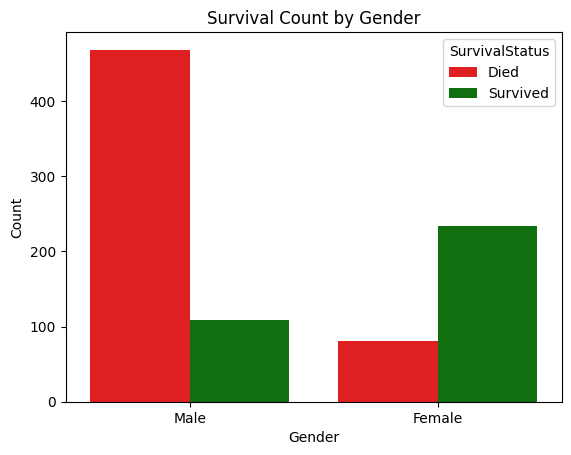

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_copy['Gender'] = df_copy['Sex'].map({0: 'Female', 1: 'Male'})
df_copy['SurvivalStatus'] = df_copy['Survived'].map({0: 'Died', 1: 'Survived'})

sns.countplot(x='Gender', hue='SurvivalStatus', data=df_copy,palette={'Died':'red','Survived':'green'})
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
# Insight: Female passengers had a significantly higher survival rate than male passengers,
# supporting the "women and children first" evacuation policy.


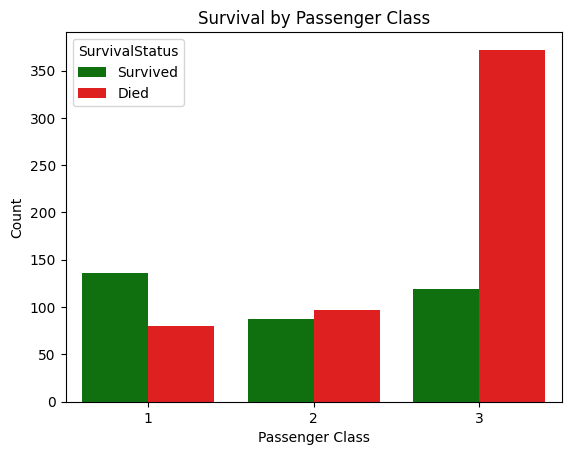

In [ ]:
sns.countplot(x='Pclass', hue='SurvivalStatus', data=df_copy,palette={'Died':'red','Survived':'green'})
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()
# Insight: Survival probability increased with passenger class, with first-class passengers
# showing the highest survival rates and third-class the lowest.


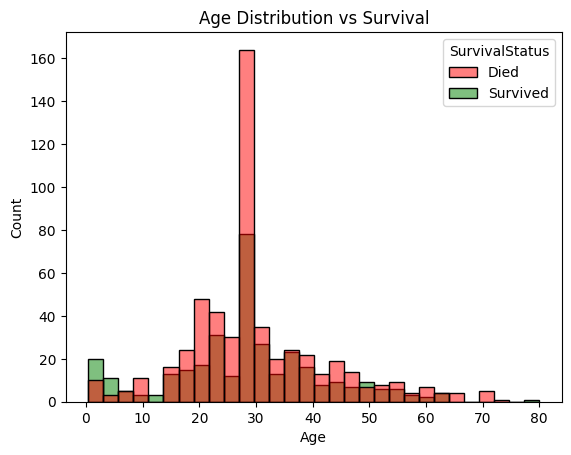

In [ ]:
sns.histplot(data=df_copy, x='Age', hue='SurvivalStatus', bins=30,palette={'Died':'red','Survived':'green'})
plt.title('Age Distribution vs Survival')
plt.show()
# Insight: Younger passengers, especially children, had higher survival chances compared
# to adults and elderly passengers.


/tmp/ipython-input-3004879928.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='SurvivalStatus', y='Fare', data=df_copy, inner='quartile',palette={'Died':'red','Survived':'green'})


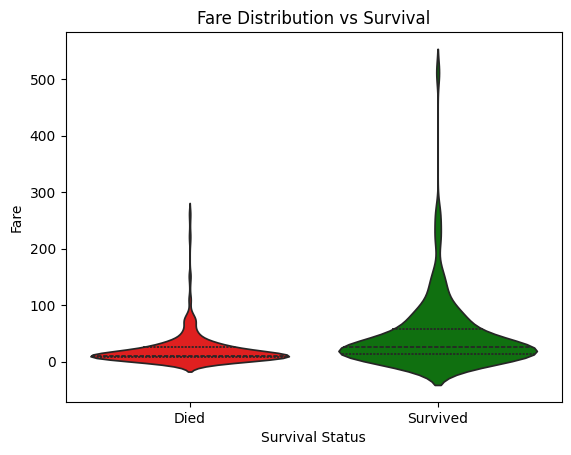

In [ ]:

# Insight: Passengers who paid higher fares were more likely to survive, indicating that
# socio-economic status played a significant role in survival outcomes.

sns.violinplot(x='SurvivalStatus', y='Fare', data=df_copy, inner='quartile',palette={'Died':'red','Survived':'green'})
plt.title('Fare Distribution vs Survival')
plt.xlabel('Survival Status')
plt.ylabel('Fare')
plt.show()


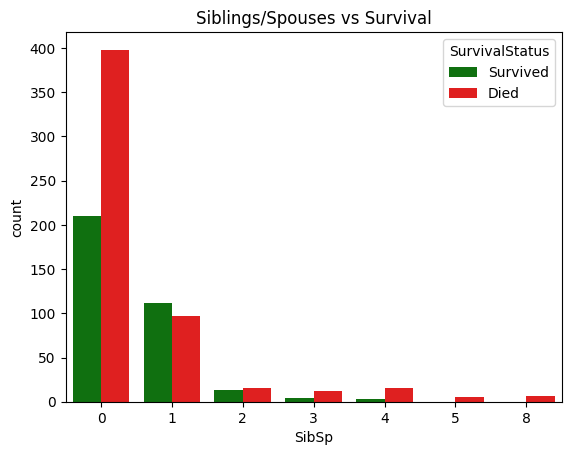

In [ ]:
# Insight: Passengers traveling with small families had better survival outcomes compared
# to those traveling alone or in large family groups.

sns.countplot(x='SibSp', hue='SurvivalStatus', data=df_copy,palette={'Died':'red','Survived':'green'})
plt.title('Siblings/Spouses vs Survival')
plt.show()


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        891 non-null    int64  
 1   Pclass          891 non-null    int64  
 2   Sex             891 non-null    int64  
 3   Age             891 non-null    float64
 4   SibSp           891 non-null    int64  
 5   Parch           891 non-null    int64  
 6   Fare            891 non-null    float64
 7   Embarked_Q      891 non-null    bool   
 8   Embarked_S      891 non-null    bool   
 9   Gender          891 non-null    object 
 10  SurvivalStatus  891 non-null    object 
dtypes: bool(2), float64(2), int64(5), object(2)
memory usage: 64.5+ KB


In [ ]:
df_copy.drop('SurvivalStatus',axis = 1, inplace = True)
df_copy.drop('Gender',axis = 1, inplace = True)

In [ ]:
X = df_copy.drop('Survived', axis=1)
y = df_copy['Survived']


LINEAR REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = lin_reg.predict(X_test)
y_pred_binary = (y_pred >= 0.5).astype(int)


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_binary)
print("Linear Regression Accuracy:", accuracy*100,'%')


Linear Regression Accuracy: 79.3296089385475 %


LOGISTIC REGRESSION MODEL

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
y_pred = log_reg.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_log = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy_log)


Logistic Regression Accuracy: 0.8100558659217877


Kth NEAREST NEIGBOUR KNN

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [ ]:
y_pred_knn = knn.predict(X_test_scaled)


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)


KNN Accuracy: 0.8044692737430168


In [ ]:
print("Linear Regression Accuracy:", accuracy*100,'%')
print("Logistic Regression Accuracy:", accuracy_log*100,'%')
print("KNN Accuracy:", accuracy_knn*100,'%')

model_accuracy = {"Linear Regression":accuracy,"Logistic Regression":accuracy_log,"KNN Algorith":accuracy_knn}

best_model = max(model_accuracy, key=model_accuracy.get)
best_accuracy = model_accuracy[best_model]

print("Best Model:", best_model)
print("Best Accuracy:", best_accuracy * 100, "%")

Linear Regression Accuracy: 79.3296089385475 %
Logistic Regression Accuracy: 81.00558659217877 %
KNN Accuracy: 80.44692737430168 %
Best Model: Logistic Regression
Best Accuracy: 81.00558659217877 %


sample I/O

In [ ]:
#SAMPLE INPUT

import pandas as pd

sample_passenger = pd.DataFrame([{
    'Pclass': 3,
    'Sex': 1,        # male
    'Age': 22,
    'SibSp': 1,
    'Parch': 0,
    'Fare': 7.25,
    'Embarked_Q': 0,
    'Embarked_S': 1
}])


In [ ]:
pred_lin = lin_reg.predict(sample_passenger)
result_lin = "Survived" if pred_lin[0] >= 0.5 else "Died"

print("Linear Regression Raw:", pred_lin[0])
print("Linear Regression Prediction:", result_lin)


Linear Regression Raw: 0.09438553953188045
Linear Regression Prediction: Died


In [ ]:
pred_log = log_reg.predict(sample_passenger)
prob_log = log_reg.predict_proba(sample_passenger)[0][1]

print("Logistic Regression Probability:", prob_log)
print("Logistic Regression Prediction:",
      "Survived" if pred_log[0] == 1 else "Died")


Logistic Regression Probability: 0.09800902764830981
Logistic Regression Prediction: Died


In [ ]:
sample_scaled = scaler.transform(sample_passenger)

pred_knn = knn.predict(sample_scaled)
print("KNN Prediction:", "Survived" if pred_knn[0] == 1 else "Died")


KNN Prediction: Died
